<a href="https://colab.research.google.com/github/DerinOgrenme2021/IsaAlperenSaylar/blob/main/Isa_Alperen_Saylar_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import logging
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [3]:
train_dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [4]:
train_dataset.info

<bound method DataFrame.info of       longitude  latitude  ...  median_income  median_house_value
0       -122.05     37.37  ...         6.6085            344700.0
1       -118.30     34.26  ...         3.5990            176500.0
2       -117.81     33.78  ...         5.7934            270500.0
3       -118.36     33.82  ...         6.1359            330000.0
4       -119.67     36.33  ...         2.9375             81700.0
...         ...       ...  ...            ...                 ...
2995    -119.86     34.42  ...         1.1790            225000.0
2996    -118.14     34.06  ...         3.3906            237200.0
2997    -119.70     36.30  ...         2.2895             62000.0
2998    -117.12     34.10  ...         3.2708            162500.0
2999    -119.63     34.42  ...         8.5608            500001.0

[3000 rows x 9 columns]>

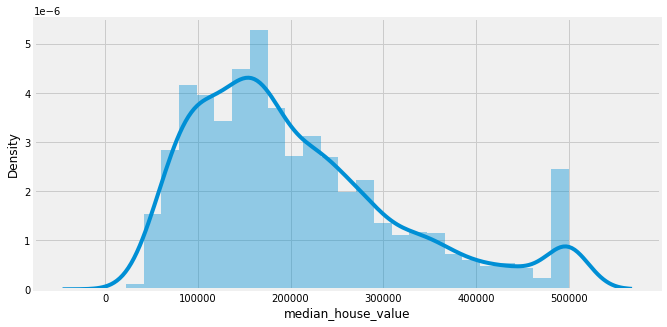

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(train_dataset["median_house_value"])

In [6]:
print(train_dataset.isnull().sum())
print ('-'*10)
print (test_dataset.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
----------
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [7]:
print(train_dataset.corr())

                    longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.925017  ...      -0.018701           -0.050662
latitude            -0.925017  1.000000  ...      -0.072363           -0.138428
housing_median_age  -0.064203 -0.025143  ...      -0.144315            0.091409
total_rooms          0.049865 -0.039632  ...       0.221249            0.160427
total_bedrooms       0.070869 -0.068245  ...       0.024025            0.082279
population           0.111572 -0.117318  ...       0.032361           -0.001192
households           0.051062 -0.068296  ...       0.048625            0.100176
median_income       -0.018701 -0.072363  ...       1.000000            0.672695
median_house_value  -0.050662 -0.138428  ...       0.672695            1.000000

[9 rows x 9 columns]


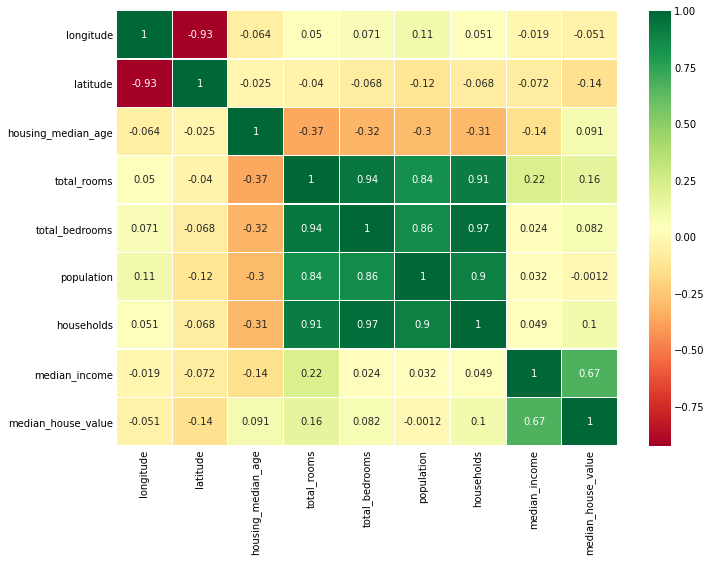

In [8]:
sns.heatmap(train_dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [9]:
features_col=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
train_ds = train_dataset[features_col]
test_ds = test_dataset[features_col]
train_label = train_dataset['median_house_value']
print(train_ds.columns)
train_ds.head(5)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [10]:
X = train_dataset.drop("median_house_value",axis=1)
y = train_dataset["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=20)

from sklearn.preprocessing import StandardScaler
training_scaler = StandardScaler()
X_train= training_scaler.fit_transform(X_train)
X_test = training_scaler.transform(X_test)

In [11]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer ='adam',loss='mse')

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=128,epochs=400, callbacks=[stop])

Epoch 1/400
19/19 [==============================] - 1s 8ms/step - loss: 55392030720.0000 - val_loss: 54254407680.0000
Epoch 2/400
19/19 [==============================] - 0s 3ms/step - loss: 55391985664.0000 - val_loss: 54254350336.0000
Epoch 3/400
19/19 [==============================] - 0s 3ms/step - loss: 55391916032.0000 - val_loss: 54254284800.0000
Epoch 4/400
19/19 [==============================] - 0s 2ms/step - loss: 55391850496.0000 - val_loss: 54254215168.0000
Epoch 5/400
19/19 [==============================] - 0s 2ms/step - loss: 55391789056.0000 - val_loss: 54254153728.0000
Epoch 6/400
19/19 [==============================] - 0s 2ms/step - loss: 55391707136.0000 - val_loss: 54254075904.0000
Epoch 7/400
19/19 [==============================] - 0s 2ms/step - loss: 55391612928.0000 - val_loss: 54253985792.0000
Epoch 8/400
19/19 [==============================] - 0s 2ms/step - loss: 55391481856.0000 - val_loss: 54253871104.0000
Epoch 9/400
19/19 [=============================

In [13]:
predictions = model.predict(X_test)
mean_squared_error(y_test,predictions)
np.sqrt(mean_squared_error(y_test,predictions))

200889.6782336117